In [1]:
import numpy as np
import pygad
import copy
import random
import time
from tabulate import tabulate
import matplotlib.pyplot as plt


Minesweeper is a logic puzzle video game genre generally played on personal computers. The game features a grid of clickable squares, with hidden "mines" scattered throughout the board. The objective is to clear the board without detonating any mines, with help from clues about the number of neighboring mines in each field.

In [2]:

# Constants
# SMALL 10X10
# MEDIUM 20X20
# LARGE 30X30

BOARD_SIZE = (5, 5) 
NUM_MINES = 5


In [3]:

# Function to create a random Minesweeper board
def create_board():
    board = np.zeros(BOARD_SIZE)
    for i in range(NUM_MINES):
        x, y = random.randint(0, BOARD_SIZE[0]-1), random.randint(0, BOARD_SIZE[1]-1)
        board[x][y] = 1
    return board

# Function to get the number of mines adjacent to a cell
def get_adjacent_mines(board, x, y):
    count = 0
    for i in range(max(0, x-1), min(x+2, BOARD_SIZE[0])):
        for j in range(max(0, y-1), min(y+2, BOARD_SIZE[1])):
            if board[i][j] == 1:
                count += 1
    return count

# Function to get the state of the game
def get_state(board, revealed):
    state = np.zeros(BOARD_SIZE)
    for i in range(BOARD_SIZE[0]):
        for j in range(BOARD_SIZE[1]):
            if revealed[i][j]:
                state[i][j] = get_adjacent_mines(board, i, j)
            else:
                state[i][j] = -1
    return state.flatten()

# Function to play a move
def play_move(board, revealed, x, y):
    if board[x][y] == 1:
        return -1
    else:
        revealed[x][y] = True
        return 1


Chromoseome representation is a 2D array of floats with diffrent values, higher the vlaue, higher the chance of being selected
as a move to play

fitness function generates a gome of minesweeper and an array the same size with True values. Then checks how many mines is around the cell and sets a value of a cell, then 
it plays a move and checks if the move was correct, if it was correct it adds 1 to the fitness score, if it was incorrect it sets a score to -1 and breaks the loop
the best fitness equals to the number of cells on the board

In [4]:

# Fitness function for the genetic algorithm
def fitness_func(solution, solution_idx):
    board = create_board()
    revealed = np.zeros(BOARD_SIZE, dtype=bool)
    score = 0
    for i in range(BOARD_SIZE[0]*BOARD_SIZE[1]):
        inputs = get_state(board, revealed)
        idx = np.argmax(solution*inputs)
        x, y = idx // BOARD_SIZE[1], idx % BOARD_SIZE[1]
        result = play_move(board, revealed, x, y)
        if result == -1:
            score = -1
            break
        else:
            score += result

    return score


In [5]:

# Initialize the genetic algorithm
ga_small = pygad.GA(num_generations=50, 
              num_parents_mating=2, 
              fitness_func=fitness_func, 
              sol_per_pop=10, 
              num_genes=25)

ga_mid = pygad.GA(num_generations=150, 
              num_parents_mating=6, 
              fitness_func=fitness_func, 
              sol_per_pop=40, 
              num_genes=100)

ga_big = pygad.GA(num_generations=300, 
              num_parents_mating=12, 
              fitness_func=fitness_func, 
              sol_per_pop=80, 
              num_genes=225,
              stop_criteria=["reach_900"])              

ga_small.run()
print(ga_small.best_solution())


(array([-1.99428493e+00,  2.43210789e+00,  1.31851933e+00,  3.19213965e-03,
       -1.91112968e+00,  2.81144791e+00, -3.02839294e-01,  2.85501984e+00,
        3.63466303e+00,  2.91209129e+00,  2.91294935e+00, -4.90206430e+00,
       -2.07610231e+00, -1.61313006e+00, -6.32710537e-01,  2.34676671e-01,
       -2.95723170e+00, -3.36096211e+00,  2.05045016e+00,  3.25387758e+00,
        2.45608780e+00,  3.68707860e-01,  2.26166470e+00,  4.15928966e-01,
        1.66623664e+00]), 25, 0)


The Algorithm seems to handle the problem pretty well, it takes some time with bigger boards, but gets there at the end with good results.

avg time small:  0.12183620929718017
ideal solutions small:  100.0  / 100
avg time mid:  4.655235621929169
ideal solutions mid:  100.0  / 100
avg time big:  47.032124242782594
ideal solutions big:  100.0  / 100
╒══════════════╤════════════╤═══════════════════╕
│ Board size   │   Avg time │ Ideal solutions   │
╞══════════════╪════════════╪═══════════════════╡
│ 5x5          │   0.121836 │ 100.0 / 100       │
├──────────────┼────────────┼───────────────────┤
│ 10x10        │   4.65524  │ 100.0 / 100       │
├──────────────┼────────────┼───────────────────┤
│ 15x15        │  47.0321   │ 100.0 / 100       │
╘══════════════╧════════════╧═══════════════════╛


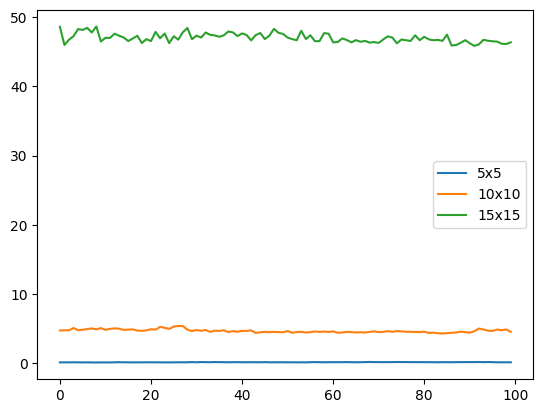

In [104]:
times_small = []
right_solutios_small = np.zeros(100)

for i in range(100):
    start = time.time()
    ga_small.run()
    end = time.time()
    if(ga_small.best_solution()[1] == 25):
        right_solutios_small[i] = 1
        times_small.append(end - start)
    else:   
        right_solutios_small[i] = 0

BOARD_SIZE = (10, 10)
NUM_MINES = 10
times_mid = []
right_solutios_mid = np.zeros(100)

for i in range(100):
    start = time.time()
    ga_mid.run()
    end = time.time()
    if(ga_mid.best_solution()[1] == 100):
        right_solutios_mid[i] = 1
        times_mid.append(end - start)
    else:   
        right_solutios_mid[i] = 0

BOARD_SIZE = (15, 15)
NUM_MINES = 15
times_big = []
right_solutios_big = np.zeros(100)

for i in range(100):
    start = time.time()
    ga_big.run()
    end = time.time()
    if(ga_big.best_solution()[1] == 225):
        right_solutios_big[i] = 1
        times_big.append(end - start)
    else:   
        right_solutios_big[i] = 0

print("avg time small: ", sum(times_small)/len(times_small))
print("ideal solutions small: ", sum(right_solutios_small), " / 100")

print("avg time mid: ", sum(times_mid)/len(times_mid))
print("ideal solutions mid: ", sum(right_solutios_mid), " / 100")

print("avg time big: ", sum(times_big)/len(times_big))
print("ideal solutions big: ", sum(right_solutios_big), " / 100")                

table = [["Board size", "Avg time", "Ideal solutions"],
        ["5x5", sum(times_small)/len(times_small), str(sum(right_solutios_small)) + " / 100"],
        ["10x10", sum(times_mid)/len(times_mid), str(sum(right_solutios_mid)) + " / 100"],
        ["15x15", sum(times_big)/len(times_big), str(sum(right_solutios_big)) + " / 100"]]

print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

plt.plot(times_small)
plt.plot(times_mid)
plt.plot(times_big)
plt.legend(["5x5", "10x10", "15x15"])
plt.show()


